<a href="https://colab.research.google.com/github/jumbokh/nknu-class/blob/main/notebooks/LeetCodeAnalysis1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LeetCode 題目的數據分析
# 第一集：LeetCode 資料表總覽與初步分析
LeetCode 是個線上練習寫程式題目的網站，專門收集軟體工程師的面試考古題，許多求職者為增加解題經驗，常會到 Leetcode 上刷題，是個很知名的程式網站。於是我用了 Python 的 Pandas 和 Seaborn 做關於 Leetcode 的題目資料分析，看看能從資料中挖掘出什麼關係或趨勢。
###### 目前有：
###### 第一集：[LeetCode 資料表總覽與初步分析](https://colab.research.google.com/drive/1U1LeCCbEwloMlztrz6K2gdvBtX1VTWc9?usp=sharing)
###### 第二集：[LeetCode 最受歡迎與最不受歡迎的前十道簡單題](https://colab.research.google.com/drive/1ELTd_teX3hnUoeiNd3_QQFiErzvBNVcF?usp=sharing)
###### 第三集：[更公正的 LeetCode 最受歡迎與最不受歡迎的題目](https://colab.research.google.com/drive/1XPtt2GXHrvOS7oOQ5vNHIo4aBlITyyT4?usp=sharing)
###### 第四集：[實作 LeetCode 加強版題目篩選器](https://colab.research.google.com/drive/1DCFB1jFkn_roCL1GskDTOD0--ZPPp4D1?usp=sharing)
###### 第五集：[LeetCode 繳交數和題目順序的趨勢](https://colab.research.google.com/drive/1BUFsfylP1FqpoP-NOXYlt6NXuaHXKx3F?usp=sharing)

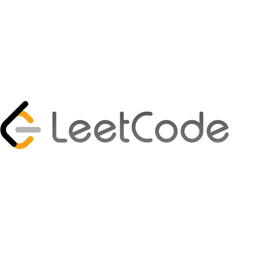

# LeetCode 資料表總覽與初步分析

在做分析之前，得先對資料有個初步的了解，進而做之後的分析，所以這一集是做資料總覽，並介紹一些 Pandas 實用的語法，方便將來說明程式的邏輯。

# 1. 讀取資料

這筆資料使用網路爬蟲抓取來並放到 github 上面，是一個 csv 檔，裡面有 LeetCode 題目的資料。如果這個系列的文章達 20 個分享，我會再介紹如何爬取 LeetCode 的資料。這裡先匯入 Pandas ，並使用 read_csv 讀取該資料，最後使用 head 輸出資料表前十列的資料（若不在 head 裡輸入任何參數會默認成輸出五行）。

In [ ]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/OliverLiu-0722/leetcodeData/main/rawLeetcodeData.csv")
display(df.head(10))

,Unnamed: 0,Title,urls,Difficulty,Tags,Acceptance,Submission,Acceptance_Rate,Likes,Dislikes
0,0,1. Two Sum,/problems/two-sum,Easy,"['Array', 'Hash Table']",4555271,9640910,47.2%,22541,761
1,1,2. Add Two Numbers,/problems/add-two-numbers,Medium,"['Linked List', 'Math', 'Recursion']",2047557,5627989,36.3%,12777,2918
2,2,3. Longest Substring Without Repeating Characters,/problems/longest-substring-without-repeating-...,Medium,"['Hash Table', 'String', 'Sliding Window']",2331754,7307416,31.9%,15813,779
3,3,4. Median of Two Sorted Arrays,/problems/median-of-two-sorted-arrays,Hard,"['Array', 'Binary Search', 'Divide and Conquer']",1005436,3126681,32.1%,11228,1602
4,4,5. Longest Palindromic Substring,/problems/longest-palindromic-substring,Medium,"['String', 'Dynamic Programming']",1377382,4445450,31.0%,11998,741
5,5,6. ZigZag Conversion,/problems/zigzag-conversion,Medium,['String'],601008,1538680,39.0%,2590,6234
6,6,7. Reverse Integer,/problems/reverse-integer,Easy,['Math'],1630434,6254159,26.1%,5145,7767
7,7,8. String to Integer (atoi),/problems/string-to-integer-atoi,Medium,['String'],773552,4869709,15.9%,450,1225
8,8,9. Palindrome Number,/problems/palindrome-number,Easy,['Math'],1362686,2682573,50.7%,3602,1792
9,9,10. Regular Expression Matching,/problems/regular-expression-matching,Hard,"['String', 'Dynamic Programming', 'Recursion']",562175,2028643,27.7%,6165,879


#2 操作資料

## 2.1 刪除欄位
觀察一下欄位，有兩個欄位不需要用到，分別為 Unnamed: 0 和 urls，可以直接刪除，使用 drop 可以一次把多個行列一次刪除，其中 drop 的參數輸入的格式個人偏好使用 columns=，只要輸入一陣列，裡面存取所有要刪除的所有欄位，便可一次刪除。若欲刪除一個或多個列可使用 index=，使用方法同上。

In [ ]:
df = df.drop(columns=["Unnamed: 0", "urls"])
display(df.head(10))

,Title,Difficulty,Tags,Acceptance,Submission,Acceptance_Rate,Likes,Dislikes
0,1. Two Sum,Easy,"['Array', 'Hash Table']",4555271,9640910,47.2%,22541,761
1,2. Add Two Numbers,Medium,"['Linked List', 'Math', 'Recursion']",2047557,5627989,36.3%,12777,2918
2,3. Longest Substring Without Repeating Characters,Medium,"['Hash Table', 'String', 'Sliding Window']",2331754,7307416,31.9%,15813,779
3,4. Median of Two Sorted Arrays,Hard,"['Array', 'Binary Search', 'Divide and Conquer']",1005436,3126681,32.1%,11228,1602
4,5. Longest Palindromic Substring,Medium,"['String', 'Dynamic Programming']",1377382,4445450,31.0%,11998,741
5,6. ZigZag Conversion,Medium,['String'],601008,1538680,39.0%,2590,6234
6,7. Reverse Integer,Easy,['Math'],1630434,6254159,26.1%,5145,7767
7,8. String to Integer (atoi),Medium,['String'],773552,4869709,15.9%,450,1225
8,9. Palindrome Number,Easy,['Math'],1362686,2682573,50.7%,3602,1792
9,10. Regular Expression Matching,Hard,"['String', 'Dynamic Programming', 'Recursion']",562175,2028643,27.7%,6165,879


刪除後的資料表看起來簡潔很多，資料量也比較小。

## 2.2 快速瀏覽資料
接下來使用 info ，能快速瀏覽數據的基本資訊，主要是用於初步判斷資料量和欄位的型別。

In [ ]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Title            1465 non-null   object
 1   Difficulty       1465 non-null   object
 2   Tags             1465 non-null   object
 3   Acceptance       1465 non-null   int64 
 4   Submission       1465 non-null   int64 
 5   Acceptance_Rate  1465 non-null   object
 6   Likes            1465 non-null   int64 
 7   Dislikes         1465 non-null   int64 
dtypes: int64(4), object(4)
memory usage: 91.7+ KB


None

由 info 函式可已看出，此資料表有 1465 個欄位。雖然 LeetCode 目前已有將近兩千題，然而並非每道題都是公開的，有些題目會上鎖，得購買 LeetCode Plus 才會解鎖。而我在爬蟲時把非公開題目直接跳過了，故只剩 1465 題。

## 2.3 微調資料表
根據資料表和 info，可看出一些需要小修改的地方，例如 Acceptance_Rate 欄位是個 object 而非 int64，還有 index 應被設為題號，而且，Tags 欄位的資料型態是 string 而非 list 。於是這裡使用 apply 對欄位修改，apply 函式需輸入一個函式，並對欄位裡的每一元素做該函式的操作。其中值得一提的是我是使用正則表達式（re）從題目名稱裡擷取出題號的，簡單來說他能輸出符合指定格式的字串，於是我將格式設為抓取開頭的數字，並將之設為新的 index。

In [ ]:
import re

df["id"] = df["Title"].apply(lambda s: re.match(r"(\d+)\..*", s).group(1))
df = df.set_index("id")
df["Acceptance_Rate"] = df["Acceptance_Rate"].apply(lambda s: float(s[:-1]) / 100)
df["Tags"] = df["Tags"].apply(lambda s: eval(s))
display(df.head(10))
display(df.info())

,Title,Difficulty,Tags,Acceptance,Submission,Acceptance_Rate,Likes,Dislikes
id,,,,,,,,
1,1. Two Sum,Easy,"[Array, Hash Table]",4555271,9640910,0.472,22541,761
2,2. Add Two Numbers,Medium,"[Linked List, Math, Recursion]",2047557,5627989,0.363,12777,2918
3,3. Longest Substring Without Repeating Characters,Medium,"[Hash Table, String, Sliding Window]",2331754,7307416,0.319,15813,779
4,4. Median of Two Sorted Arrays,Hard,"[Array, Binary Search, Divide and Conquer]",1005436,3126681,0.321,11228,1602
5,5. Longest Palindromic Substring,Medium,"[String, Dynamic Programming]",1377382,4445450,0.310,11998,741
6,6. ZigZag Conversion,Medium,[String],601008,1538680,0.390,2590,6234
7,7. Reverse Integer,Easy,[Math],1630434,6254159,0.261,5145,7767
8,8. String to Integer (atoi),Medium,[String],773552,4869709,0.159,450,1225
9,9. Palindrome Number,Easy,[Math],1362686,2682573,0.507,3602,1792


<class 'pandas.core.frame.DataFrame'>
Index: 1465 entries, 1 to 1928
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Title            1465 non-null   object 
 1   Difficulty       1465 non-null   object 
 2   Tags             1465 non-null   object 
 3   Acceptance       1465 non-null   int64  
 4   Submission       1465 non-null   int64  
 5   Acceptance_Rate  1465 non-null   float64
 6   Likes            1465 non-null   int64  
 7   Dislikes         1465 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 103.0+ KB


None

現在的資料表已經大致微調完畢，能開始進行初步分析。

# 3 初步分析

## 3.1 各項統計數據
進行初步的分析時，我通常都會使用 describe 函式，其能顯示每個欄位的各項統計數據，如平均、最大最小值等。使用 describe 能快速對這數據有更多認識。

In [ ]:
display(df.describe())

,Acceptance,Submission,Acceptance_Rate,Likes,Dislikes
count,1.465000e+03,1.465000e+03,1465.000000,1465.000000,1465.000000
mean,1.532374e+05,3.293761e+05,0.515973,1409.408874,325.869625
std,2.713479e+05,6.467556e+05,0.142649,1873.201387,679.653274
min,1.712000e+03,3.296000e+03,0.137000,20.000000,2.000000
25%,1.883600e+04,3.804000e+04,0.408000,330.000000,43.000000
50%,4.961000e+04,8.984000e+04,0.506000,688.000000,120.000000
75%,1.654040e+05,3.314400e+05,0.608000,1659.000000,298.000000
max,4.555271e+06,9.640910e+06,0.949000,22541.000000,9588.000000


觀察上面的資料表，發現除 Acceptance_Rate 外，每個欄位的資料都相當離散，以 Submission 而言，中位數和第三四分位數差了三倍，Dislike 欄位更為明顯，平均數遠超過中位數，甚至是第三四分位數。

## 3.2 繪製盒狀圖
為更清楚知道資料分布狀況，接下來使用盒狀圖分析每個欄位。使用 Seaborn 的 boxenplot，它跟一般的 boxplot（盒狀圖）最大的差別在於可以切割出更多部分。另設定了以難度分類，做出三個盒狀圖。而針對每個欄位畫盒狀圖時，需要使用 subplot 畫出更多子圖表。

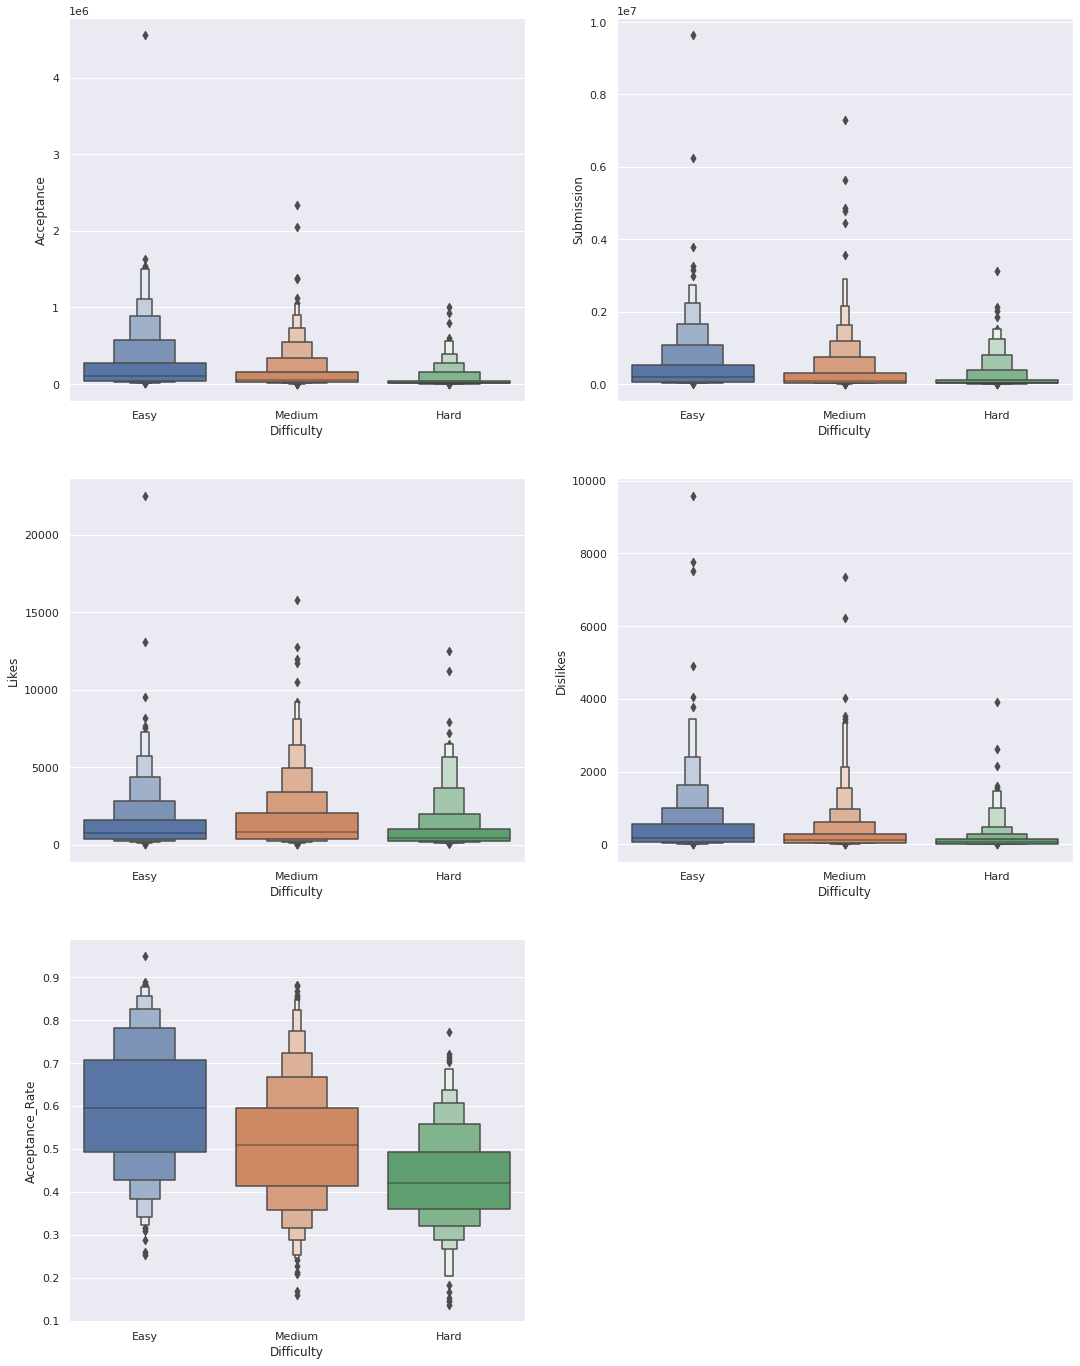

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(color_codes=True)
plt.figure(figsize=(18, 24))
for i, key in enumerate(["Acceptance", "Submission", "Likes", "Dislikes", "Acceptance_Rate"]):
  plt.subplot(3, 2, i + 1)
  sns.boxenplot(data=df, x='Difficulty', y=key)

跟我先前的觀察一致，除了 Acceptance_Rate 以外分布狀況都相當離散。而且可以看出有特定幾題數值特別大，那些題目很有可能是影響平均數的主因。Acceptance_Rate 的部分，簡單題、中等題、困難題的正確率有較明顯的差別，但其它欄位中除某些極值外，沒有什麼明顯的區別，可以推論出正確數、繳交數、按讚數和倒讚數並不會依照題目難度而有所變化。

## 3.3 繪製 Tags 分布狀況的長條圖
接下來要研究的是每個標籤出現的情形，LeetCode 每個題目會出現一或多的標籤，在選擇做題的時候標籤就是個很好的依據，可用於判斷題型。只要分析標籤分佈情形，便能得知 LeetCode 題型分布狀況。在實作的時候，我使用 Counter 物件計算每個標籤出現次數，並取最常出現的 15 個。最後將之存入新的 DataFrame 中，再繪製出長條圖。

,Tag,Count
0,Array,748
1,String,364
2,Dynamic Programming,280
3,Math,274
4,Hash Table,254
5,Sorting,173
6,Greedy,165
7,Depth-First Search,165
8,Breadth-First Search,139
9,Tree,129


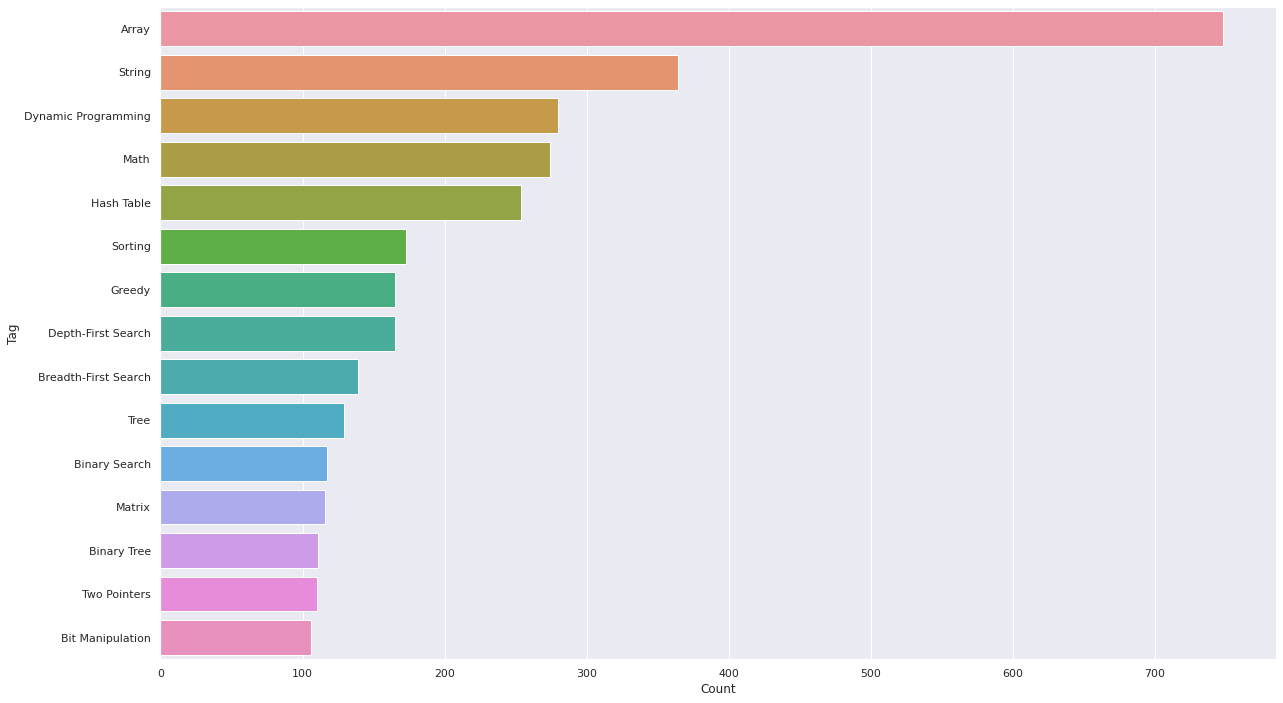

In [ ]:
from collections import Counter

# df["Tags"] = df["Tags"].apply(lambda s: eval(s))
c = Counter()
for tags in df["Tags"]:
  for tag in tags:
      c[tag] += 1

s = pd.DataFrame(c.most_common())
s.columns = ["Tag", "Count"]
display(s.head(15))
plt.figure(figsize = (20, 12))
sns.barplot(data = s[:15], x = "Count", y = "Tag")

Array 是所有標籤中最高頻率出現的，出現次數甚至超過總題數的一半，即有一半的題目都有 Array 的標籤。而所有前 15 名的標籤都是有許多變化的基本概念、演算法或資料結構，所以能做出許多變化題且較常與其他標籤一起出現，出現頻率亦隨之增加。

# 4 小結

由上面的分析方法，我們可以觀察出整筆資料的概況，並知道它的分布情形其實很不均勻。有了分布狀況，對於將來的分析會更有幫助。

接下來就會陸續做更多 LeetCode 數據分析的系列，由簡單到難都有，看看 LeetCode 題目中還有什麼沒被觀察到的現象。